## batman equation

\begin{align}
f(x) = &\left(\left(\frac x7\right)^2\sqrt{\frac{||x|-3|}{|x|-3}}+\left(\frac y3\right)^2\sqrt{\frac{\left|y+\frac{3\sqrt{33}}7\right|}{y+\frac{3\sqrt{33}}7}}-1 \right) \\ 
& \left(\left|\frac x2\right|-\left(\frac{3\sqrt{33}-7}{112}\right)x^2-3+\sqrt{1-(||x|-2|-1)^2}-y \right) \\
& \left(3\sqrt{\frac{|(|x|-1)(|x|-.75)|}{(1-|x|)(|x|-.75)}}-8|x|-y\right)\\
& \left(3|x|+.75\sqrt{\frac{|(|x|-.75)(|x|-.5)|}{(.75-|x|)(|x|-.5)}}-y \right) \\ 
& \left(2.25\sqrt{\frac{(x-.5)(x+.5)}{(.5-x)(.5+x)}}-y \right) \\
& \left(\frac{6\sqrt{10}}7+(1.5-.5|x|)\sqrt{\frac{||x|-1|}{|x|-1}} -\frac{6\sqrt{10}}{14}\sqrt{4-(|x|-1)^2}-y\right)=0
\end{align}

<ipython-input-10-0b63659b90d0>:8: RuntimeWarning: invalid value encountered in sqrt
  eq1 = ((x/7)**2*np.sqrt(np.abs(np.abs(x)-3)/(np.abs(x)-3))+(y/3)**2*np.sqrt(np.abs(y+3/7*np.sqrt(33))/(y+3/7*np.sqrt(33)))-1)
<ipython-input-10-0b63659b90d0>:9: RuntimeWarning: invalid value encountered in sqrt
  eq2 = (np.abs(x/2)-((3*np.sqrt(33)-7)/112)*x**2-3+np.sqrt(1-(np.abs(np.abs(x)-2)-1)**2)-y)
<ipython-input-10-0b63659b90d0>:10: RuntimeWarning: invalid value encountered in sqrt
  eq3 = (9*np.sqrt(np.abs((np.abs(x)-1)*(np.abs(x)-.75))/((1-np.abs(x))*(np.abs(x)-.75)))-8*np.abs(x)-y)
<ipython-input-10-0b63659b90d0>:11: RuntimeWarning: invalid value encountered in sqrt
  eq4 = (3*np.abs(x)+.75*np.sqrt(np.abs((np.abs(x)-.75)*(np.abs(x)-.5))/((.75-np.abs(x))*(np.abs(x)-.5)))-y)
<ipython-input-10-0b63659b90d0>:12: RuntimeWarning: invalid value encountered in sqrt
  eq5 = (2.25*np.sqrt(np.abs((x-.5)*(x+.5))/((.5-x)*(.5+x)))-y)
<ipython-input-10-0b63659b90d0>:13: RuntimeWarning: invalid value encount

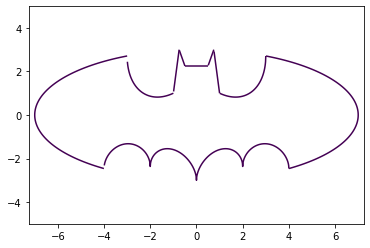

In [10]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.arange(-7.25, 7.25, 0.01)
ys = np.arange(-5, 5, 0.01)
x, y = np.meshgrid(xs, ys)

eq1 = ((x/7)**2*np.sqrt(np.abs(np.abs(x)-3)/(np.abs(x)-3))+(y/3)**2*np.sqrt(np.abs(y+3/7*np.sqrt(33))/(y+3/7*np.sqrt(33)))-1)
eq2 = (np.abs(x/2)-((3*np.sqrt(33)-7)/112)*x**2-3+np.sqrt(1-(np.abs(np.abs(x)-2)-1)**2)-y)
eq3 = (9*np.sqrt(np.abs((np.abs(x)-1)*(np.abs(x)-.75))/((1-np.abs(x))*(np.abs(x)-.75)))-8*np.abs(x)-y)
eq4 = (3*np.abs(x)+.75*np.sqrt(np.abs((np.abs(x)-.75)*(np.abs(x)-.5))/((.75-np.abs(x))*(np.abs(x)-.5)))-y)
eq5 = (2.25*np.sqrt(np.abs((x-.5)*(x+.5))/((.5-x)*(.5+x)))-y)
eq6 = (6*np.sqrt(10)/7+(1.5-.5*np.abs(x))*np.sqrt(np.abs(np.abs(x)-1)/(np.abs(x)-1))-(6*np.sqrt(10)/14)*np.sqrt(4-(np.abs(x)-1)**2)-y)

for f in [eq1,eq2,eq3,eq4,eq5,eq6]:
    plt.contour(x, y, f, [0])

plt.show()

## 2D FFT of Image
reducing number of coefficients changes all amplitudes of the image

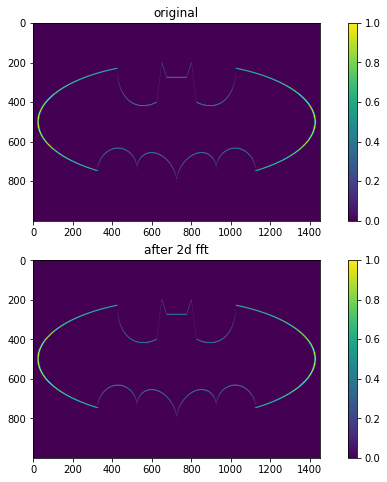

In [12]:
import numpy as np
import matplotlib.pyplot

img = np.zeros(x.shape, dtype=np.float32)
for f in [eq1,eq2,eq3,eq4,eq5,eq6]:
    img += np.abs( np.array(f) ) <1e-2

idx = np.where(img>1)
img[idx] = np.ones(idx[1].size)

coeff = np.fft.fft2(img)
#coeff = np.multiply( coeff , coeff>(0.999*coeff.max()) )
result = np.fft.ifft2(coeff)

fig = plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.title('original')
plt.imshow(np.flipud(img))
plt.colorbar()
plt.subplot(2,1,2)
plt.title('after 2d fft')
plt.imshow(np.flipud(np.abs(result)))
plt.colorbar()

## Image encoded in 1D complex function -> 1D fft
reducing number of coefficients changes only the path of the complex function

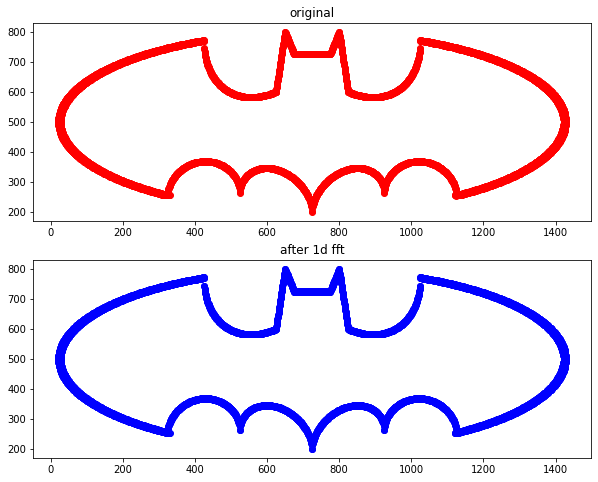

In [11]:
import numpy as np
import matplotlib.pyplot
global i
i = np.complex(0,1)

img = np.zeros(x.shape, dtype=np.float32)
for f in [eq1,eq2,eq3,eq4,eq5,eq6]:
    img += np.abs( np.array(f) ) <1e-2

idx = np.where(img>0)

img = idx[1] + i*idx[0]

coeff = np.fft.fft(img)
#coeff = np.multiply( coeff , coeff>(0.01*coeff.max()) )
result = np.fft.ifft(coeff)

fig = plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.title('original')
plt.scatter(np.real(img),np.imag(img),color='red')
plt.subplot(2,1,2)
plt.title('after 1d fft')
plt.scatter(np.real(result),np.imag(result),color='blue')